# Apziva Project-4

Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

C:\Users\nahas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(tf.__version__)   # checking the version of TensorFlow

2.16.1


##### Loading the data

In [3]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'images/training', batch_size=32, image_size=(180, 180), seed=42)

Found 2392 files belonging to 2 classes.


In [4]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'images/testing', batch_size=32, image_size=(180, 180), seed=42
    )

Found 597 files belonging to 2 classes.


In [5]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Check the class names from the class_names attribute of the datasets

In [6]:
class_names = training_dataset.class_names
print(class_names)

['flip', 'notflip']


In [7]:
class_names_test = test_dataset.class_names
print(class_names_test)

['flip', 'notflip']


##### Visualize the data

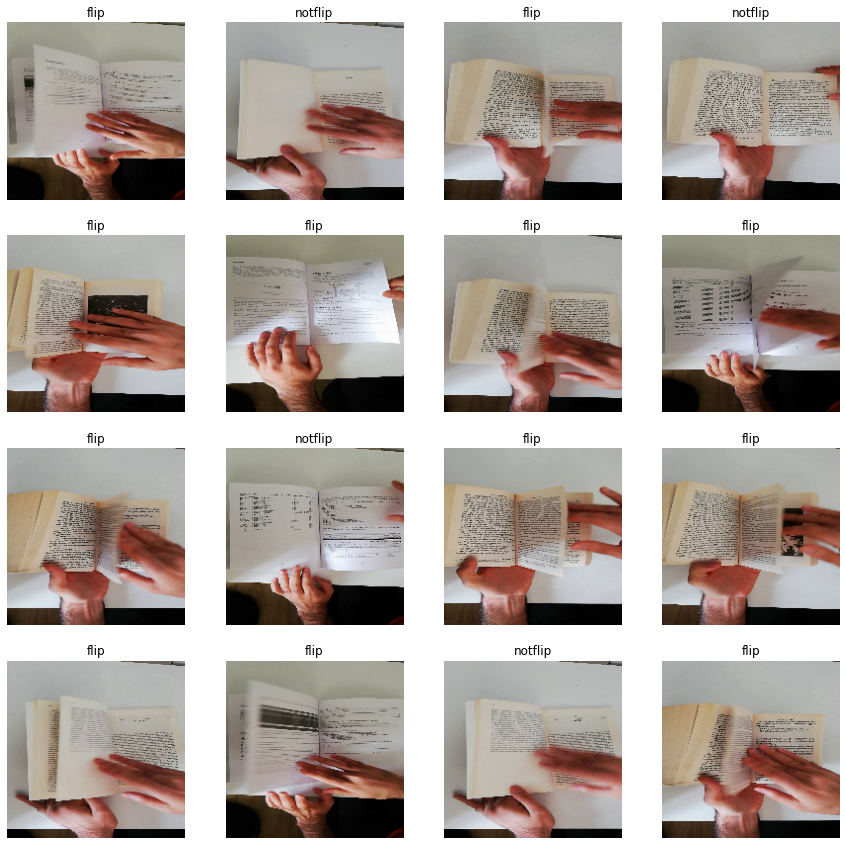

In [8]:
plt.figure(figsize=(15, 15))
for images, labels in training_dataset.take(1):
#for images, labels in training_dataset:
  for i in range(16):                                # printing 16 images
    ax = plt.subplot(4, 4, i + 1)                    # specifying the number of images in rows and columns
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in training_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). 
The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [10]:
print(labels_batch[0])     # printing the first label

tf.Tensor(1, shape=(), dtype=int32)


In [11]:
print(image_batch[0])     # printing the first image

tf.Tensor(
[[[152.       145.       129.      ]
  [153.5      147.5      131.5     ]
  [150.5      149.5      130.5     ]
  ...
  [124.333336 125.333336 109.333336]
  [131.25     125.25     111.25    ]
  [128.25     125.25     110.25    ]]

 [[152.75     145.       127.5     ]
  [149.75     145.75     127.      ]
  [150.25     146.75     128.25    ]
  ...
  [ 89.75      87.25      75.5     ]
  [ 91.        88.5       79.25    ]
  [ 97.75      93.75      83.75    ]]

 [[155.       148.       129.      ]
  [152.       147.       127.      ]
  [150.       148.       127.      ]
  ...
  [ 63.833332  59.833332  48.833332]
  [ 63.833332  63.833332  53.833332]
  [ 65.83333   61.833332  52.833332]]

 ...

 [[  3.         1.         2.      ]
  [  2.         2.         2.      ]
  [  1.         3.         2.      ]
  ...
  [  3.         3.         1.      ]
  [  3.         3.         1.      ]
  [  2.         2.         0.      ]]

 [[  5.25       1.25       2.5     ]
  [  3.         3.        

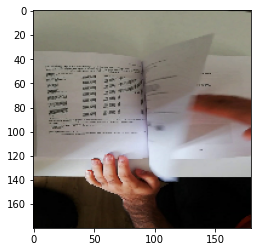

In [12]:
image_batch_training, labels_batch_training = next(iter(training_dataset))
plt.imshow(image_batch_training[0].numpy().astype("uint8"))

##### Cropping

In [13]:
# Testing without cropping
cropping_layer = tf.keras.layers.Cropping2D(cropping=((10, 10), (20, 20)))

In [14]:
# training_dataset_cropped = training_dataset.map(lambda x, y: (cropping_layer(x), y))
# Don't crop
training_dataset_cropped = training_dataset

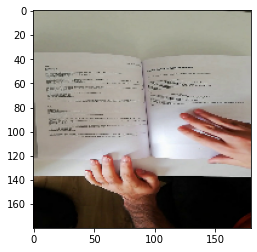

In [15]:
image_batch_cropped, labels_batch_cropped = next(iter(training_dataset_cropped))
plt.imshow(image_batch_cropped[0].numpy().astype("uint8"))

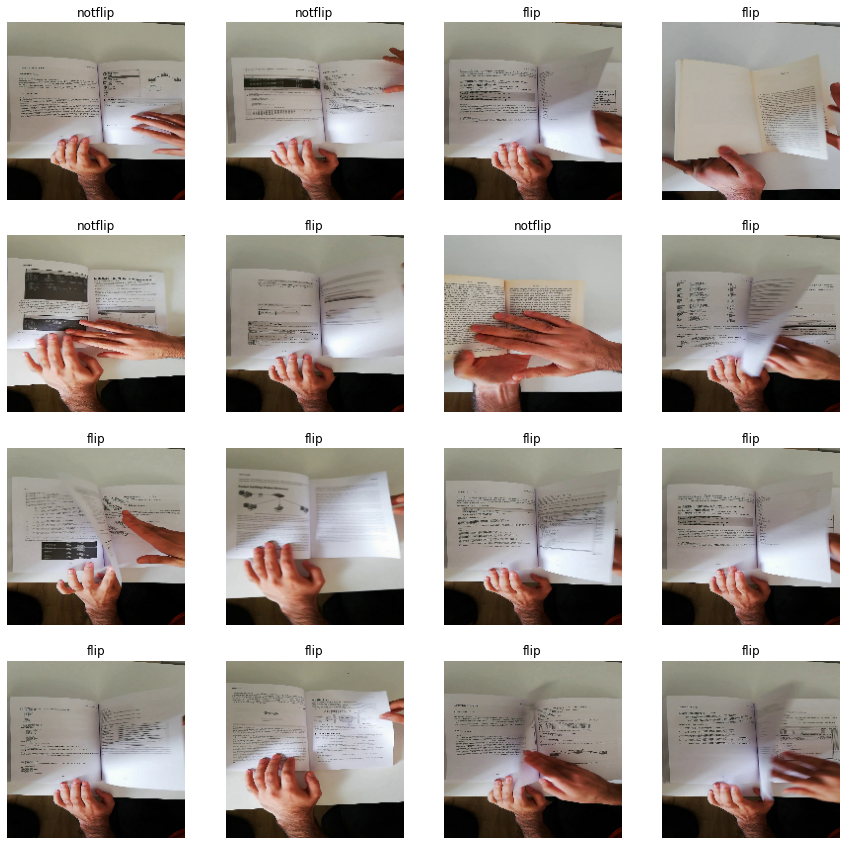

In [16]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
#for images, labels in training_dataset_cropped.take(1):
for images, labels in training_dataset_cropped:
  for i in range(16):                                # printing 16 images
    ax = plt.subplot(4, 4, i + 1)                    # specifying the number of images in rows and columns
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
for image_batch, labels_batch in training_dataset_cropped:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


##### Standardization / Normalization  ---> Not executed because rescaling is done within the model

##### Create the model

In [18]:
num_classes = len(class_names)
batch_size = 32
img_height = 180
img_width = 180

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  #layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid')
])

C:\Users\nahas\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


View all the layers of the network using the Keras 'Model.summary' method

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      13,107,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,131,809 (50.09 MB)

 Trainable params: 13,131,809 (50.09 MB)

 Non-trainable params: 0 (0.00 B)

###### Compile the model

In [20]:
#optimizer = tf.keras.optimizers.legacy.Adam() # Used for mac
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

##### Train the model

In [21]:
training_dataset_cropped.element_spec

(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [22]:
training_dataset_cropped

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
image_batch_training, labels_batch_training = next(iter(training_dataset_cropped))
# Notice the pixel values are now in `[0,1]`.
print(np.min(image_batch_training[0]), np.max(image_batch_training[0]))

0.0 251.49829


In [24]:
epochs=5
DATASET_SIZE = len(training_dataset_cropped)
train_size = int(0.8 * DATASET_SIZE)
train_ds_ = training_dataset_cropped.take(train_size)
valid_ds = training_dataset_cropped.skip(train_size)
train_ds = train_ds_
history = model.fit(train_ds,validation_data = valid_ds, epochs = epochs)

Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.5690 - loss: 0.8499 - val_accuracy: 0.7691 - val_loss: 0.4604
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 402ms/step - accuracy: 0.8260 - loss: 0.3984 - val_accuracy: 0.9258 - val_loss: 0.2125
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 391ms/step - accuracy: 0.8976 - loss: 0.2555 - val_accuracy: 0.9809 - val_loss: 0.0849
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 392ms/step - accuracy: 0.9417 - loss: 0.1497 - val_accuracy: 0.9831 - val_loss: 0.0547
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 394ms/step - accuracy: 0.9722 - loss: 0.0984 - val_accuracy: 0.9979 - val_loss: 0.0384


##### Visualize training results

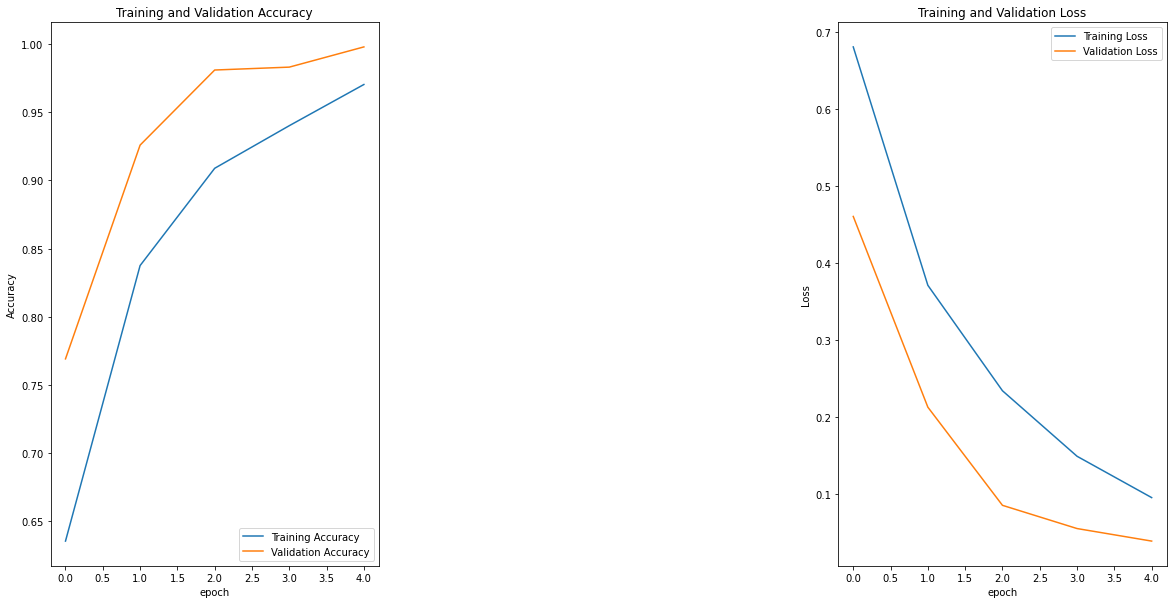

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.xticks([0, 1, 2])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.xticks([0, 1, 2])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Making prediction on the Test Dataset

<font color=blue> The __test data set__ must be _preprocessed_ to make it consistent with the training dataset

First, cropping the test dataset

In [26]:
# test_dataset_cropped = test_dataset.map(lambda x, y: (cropping_layer(x), y))
# Testing without cropping
test_dataset_cropped = test_dataset

In [27]:
test_dataset_cropped

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Now, we'll resize and rescale the 'Test Dataset'

In [28]:
for image_batch, labels_batch in test_dataset_cropped:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [29]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(180, 180),
  layers.Rescaling(1./255)
])

In [30]:
# Model will take care of scaling
# test_dataset_preprocessed = test_dataset_cropped.map(lambda x, y: (resize_and_rescale(x, training=True), y))
test_dataset_preprocessed = test_dataset_cropped

In [31]:
test_dataset_preprocessed

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
image_batch_test, labels_batch_test = next(iter(test_dataset_preprocessed))
# Notice the pixel values are now in `[0,1]`.
print(np.min(image_batch_test[0]), np.max(image_batch_test[0]))

0.0 253.66602


In [33]:
for image_batch, labels_batch in test_dataset_preprocessed:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [34]:
image_batch_test1, labels_batch_test1 = next(iter(test_dataset_cropped))
# Notice the pixel values are now in `[0,1]`.
print(np.min(image_batch_test1[0]), np.max(image_batch_test1[0]))

0.0 249.50134


In [35]:
for image_batch, labels_batch in test_dataset_cropped:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Now making prediction

Using the model directly for making predictions.

In [36]:
#predictions = tf.round(model.predict(test_dataset_preprocessed))
#predictions = tf.round(model.predict(test_dataset))   # Disabled to run on validation dataset in below cell

#print(predictions[0:10], predictions.shape)

In [37]:
#predictions = tf.round(model.predict(test_dataset_preprocessed))
predictions = tf.round(model.predict(valid_ds))

print(predictions[0:10], predictions.shape)

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step
tf.Tensor(
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]], shape=(10, 1), dtype=float32) (472, 1)


In [38]:
sum(predictions)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([259.], dtype=float32)>

Now getting the labels/class values for the test dataset

Since our data is batched, so we need to use list comprehension to put all values of 'y' in a list.

In [39]:
#test_dataset_labels = np.concatenate([y for x, y in test_dataset], axis=0)  #disabled to test with the validation dataset below

In [40]:
test_dataset_labels = np.concatenate([y for x, y in valid_ds], axis=0)

[y for x, y in test_dataset] is known as “list comprehension” in python. If dataset is batched, this expression will loop thru each batch and put each batch y (a TF 1D tensor) in the list, and return it. Then, np.concatenate will take this list of 1-D tensor (implicitly casting to numpy) and stack it in the 0-axis to produce a single long vector. In summary, it is just converting a bunch of 1-d little vector into one long vector.

In [41]:
test_dataset_labels.shape

(472,)

##### Confusion Matrix

In [42]:
def calculate_metrics(Y_test, Y_pred):
    cf_matrix = tf.math.confusion_matrix(Y_test, Y_pred)
    
    true_pos = cf_matrix[1][1]
    false_pos = cf_matrix[0][1]
    false_neg = cf_matrix[1][0]
    true_neg = cf_matrix[0][0]
    
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    
    # True positive rate
    sensitivity = true_pos / (true_pos + false_neg)
    
    # True negative rate
    specificity = true_neg / (true_neg + false_pos)

    f1_score = 2*(precision*recall)/(precision+recall)
    
    result = "precision : " + str(np.round(precision,2)) + ", recall :" + str(np.round(recall,2)) + ", sensitivity: " + str(np.round(sensitivity,2)) + ", specificity: " + str(np.round(specificity,2)) + ", F1-score: " + str(np.round(f1_score,4))
    
    print(result)
    
    return

In [43]:
def plot_confusion_matrix(test_label, pred_label):

  cf_matrix = metrics.confusion_matrix(test_label, pred_label)

  # Plot the confusion matrix
  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

precision : 0.52, recall :0.55, sensitivity: 0.55, specificity: 0.45, F1-score: 0.5357


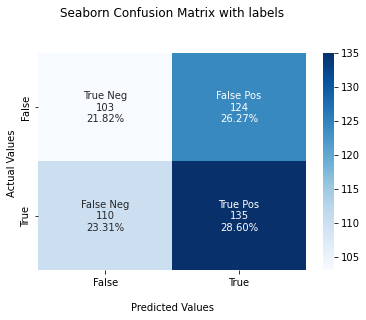

In [44]:
calculate_metrics(test_dataset_labels, predictions)
plot_confusion_matrix(test_dataset_labels, predictions)

In [45]:
cm = tf.math.confusion_matrix(
    test_dataset_labels,
    predictions#_1D#,
    #num_classes=None,
    #weights=None,
    #dtype=tf.dtypes.int32,
    #name=None
)

In [46]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[103, 124],
       [110, 135]])>

##### Investigating low F1 Score

1. Check class balance

Test dataset

Class 'flip' has 1162 images.
Class 'notflip' has 1230 images.


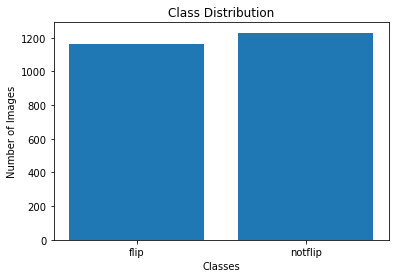

In [52]:
from collections import Counter

# Initialize a counter for classes
class_counts = Counter()

# Iterate over the dataset to count the instances of each class
for images, labels in training_dataset:
    class_counts.update(labels.numpy())  # Convert labels to numpy array and update counter

# Get class names from the dataset
class_names = training_dataset.class_names

# Print class balance
for class_id, count in class_counts.items():
    print(f"Class '{class_names[class_id]}' has {count} images.")

# Optionally, you can plot the class distribution
import matplotlib.pyplot as plt

classes = [class_names[class_id] for class_id in class_counts.keys()]
counts = list(class_counts.values())

plt.bar(classes, counts)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

Doing the same for the test_dataset

Class 'flip' has 290 images.
Class 'notflip' has 307 images.


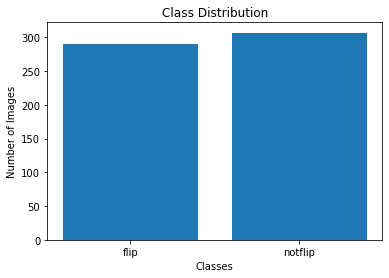

In [53]:
from collections import Counter

# Initialize a counter for classes
class_counts = Counter()

# Iterate over the dataset to count the instances of each class
for images, labels in test_dataset:
    class_counts.update(labels.numpy())  # Convert labels to numpy array and update counter

# Get class names from the dataset
class_names = test_dataset.class_names

# Print class balance
for class_id, count in class_counts.items():
    print(f"Class '{class_names[class_id]}' has {count} images.")

# Optionally, you can plot the class distribution
import matplotlib.pyplot as plt

classes = [class_names[class_id] for class_id in class_counts.keys()]
counts = list(class_counts.values())

plt.bar(classes, counts)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

### Task 2: Predict if a given sequence of images contains an action of flipping

In [59]:
# Re-sequence the dataset to have sequencees of 10 images each
sequence_size = 4
sequences_dataset = test_dataset.unbatch().batch(sequence_size)

# Function to make sequence prediction
def predict_sequence(images):
    # Make predictions on the sequence
    sequence_predictions = tf.round(model.predict(images))
    sequence_is_flip = np.any(sequence_predictions)
    return sequence_is_flip

# Extract the true labels for each sequence
def extract_sequence_labels(labels):
    # Reduce the labels to a single "true" if any label in the sequence is "flip"
    sequence_is_flip_label = np.any(labels)
    return sequence_is_flip_label

# Process each sequence and apply the "any true" logic
sequence_predictions = []
sequence_labels = []

for images, labels in sequences_dataset:
    sequence_prediction = predict_sequence(images)
    sequence_predictions.append(sequence_prediction)
    sequence_label = extract_sequence_labels(labels)
    sequence_labels.append(sequence_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

#### Confusion Matrix

In [60]:
cm = tf.math.confusion_matrix(sequence_labels, sequence_predictions)
# Print the confusion matrix
print("\nConfusion Matrix:\n")
print(cm)


Confusion Matrix:

tf.Tensor(
[[ 11   1]
 [  1 137]], shape=(2, 2), dtype=int32)


##### ---------- End ----------

##### Other methods tried for sequence predictions...

In [ ]:
import os
from PIL import Image
#import keras
import numpy

In [ ]:
training_dir = "images/training"
files_training = os.listdir(training_dir)
print('Files in Training folder: ', files_training)

test_dir = "images/testing"
files_test = os.listdir(test_dir)
print('Files in Testing folder: ', files_test)

In [ ]:
training_flip_dir = "images/training/flip"
files_training_flip = os.listdir(training_flip_dir)
print('\nFiles in training/flip folder: \n', files_training_flip)

training_notflip_dir = "images/training/notflip"
files_training_notflip = os.listdir(training_notflip_dir)
print('\nFiles in training/notflip folder: \n', files_training_notflip)

In [ ]:
test_flip_dir = "images/testing/flip"
files_test_flip = os.listdir(test_flip_dir)
print('\nFiles in test/flip folder: \n', files_test_flip)

test_notflip_dir = "images/testing/notflip"
files_test_notflip = os.listdir(test_notflip_dir)
print('\nFiles in test/notflip folder: \n', files_test_notflip)

In [ ]:
#import glob

In [ ]:
#glob.glob('images/testing/flip/??02_*.jpg')

In [ ]:
import os
import re

sequences_test_flip = {}

print('\nFile sequences:')
for f in files_test_flip:
    m = re.search('[^_]+[^_]+[^_]+[^_]+_*', f)
    if m:
        prefix = m.group(0)
        print(prefix)
        if prefix in sequences_test_flip:
            sequences_test_flip[prefix].append(f)
        else:
            sequences_test_flip[prefix] = [f]

print('\nFiles in sequences:')
for prefix in sequences_test_flip:
    print(sequences_test_flip[prefix])

In [ ]:
print(sequences_test_flip)

In [ ]:
flip = 0
for file_name in sequences_test_flip:
    image = Image.open(dir + "/" + file_name).convert('RGB')
    image = image.resize((180,180))
    #image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    #image = image/255
    pred = model.predict([image])[0]
#    sign = classes[pred]
    if pred = 'flip':
        flip+= 1
        break